In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
cost = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/COST.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [3]:
wmt = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/WMT.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [4]:
tgt = cost = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/TGT.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [5]:
dg = pd.read_csv('/Users/pratyush/Python/Python for Finance and Algorithmic Trading/Python-Finance-QuantConnect (1)/06-Financial-Concepts-with-Python/DG.csv', index_col = 'Date', parse_dates = True)['Adj Close']

In [14]:
#To concatonate all data in a new dataframe

retail = pd.concat([cost,wmt,tgt,dg], axis = 1)
retail.columns = ['COST','WMT','TGT','DG']

In [15]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [16]:
retail_returns = retail.pct_change(1).dropna()

In [46]:
retail_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


Calculate cumulative returns in terms of percent gain - What is percent gain or loss in anything at any point in time

In [47]:
#step 1
value = (1 + retail_returns['COST'])

In [19]:
value

Date
2016-09-07    0.984689
2016-09-08    0.986058
2016-09-09    0.981951
2016-09-12    1.006569
2016-09-13    0.993737
                ...   
2021-08-27    1.002292
2021-08-30    1.012413
2021-08-31    0.999035
2021-09-01    1.002261
2021-09-02    1.009748
Name: COST, Length: 1257, dtype: float64

In [20]:
#step 2
product_of_value = value.cumprod()

In [21]:
product_of_value

Date
2016-09-07    0.984689
2016-09-08    0.970960
2016-09-09    0.953435
2016-09-12    0.959699
2016-09-13    0.953689
                ...   
2021-08-27    3.196244
2021-08-30    3.235919
2021-08-31    3.232796
2021-09-01    3.240106
2021-09-02    3.271690
Name: COST, Length: 1257, dtype: float64

In [22]:
#step 3
cumulative_product = product_of_value - 1

In [23]:
cumulative_product

Date
2016-09-07   -0.015311
2016-09-08   -0.029040
2016-09-09   -0.046565
2016-09-12   -0.040301
2016-09-13   -0.046311
                ...   
2021-08-27    2.196244
2021-08-30    2.235919
2021-08-31    2.232796
2021-09-01    2.240106
2021-09-02    2.271690
Name: COST, Length: 1257, dtype: float64

In [24]:
data = {'a' : [1,2,3,4,5], 'b' : [1,-2,3,-4,5]}

In [25]:
df = pd.DataFrame(data)

In [26]:
df

,a,b
0,1,1
1,2,-2
2,3,3
3,4,-4
4,5,5


In [27]:
1 + df

,a,b
0,2,2
1,3,-1
2,4,4
3,5,-3
4,6,6


In [28]:
1 + df.cumprod()

,a,b
0,2,2
1,3,-1
2,7,-5
3,25,25
4,121,121


In [34]:
#Calculate cumulative returns in terms of percent gain - What is percent gain or loss in anything at any point in time

#Again 

cumul_return = (1 + retail_returns['COST']).cumprod() - 1

In [35]:
cumul_percent_return = cumul_return * 100

<AxesSubplot:xlabel='Date'>

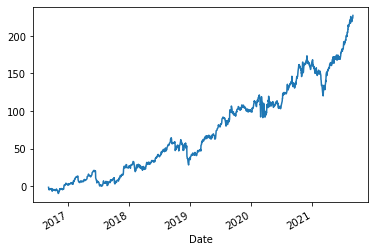

In [45]:
cumul_percent_return.plot()

How to calculate weighted returns (using dot product)


In [40]:
#Example 

np.dot([2,3],[10,20])

#This is same as saying (2*10)+(3*20)

80

In [41]:
#Lets say we have 2 stocks

example_returns = np.array([1,0.5]) #One is returning 100% and other is returning 50%

In [43]:
example_weights = [1,0] #How is the cash allocated? 100% in index 0 and 0% going in 1

In [44]:
np.dot(example_returns, example_weights)

1.0

In [51]:
#Now for the retail returns

np.dot([1,0,0,0],retail_returns.transpose())

#This value is our portfolios daily return over time if 100% of capital is invested in index 1(COSTCO)

array([-0.01531071, -0.01394238, -0.01804909, ..., -0.00096507,
        0.0022613 ,  0.00974768])

In [53]:
#for equal weights:

N = len(retail_returns.columns)
equal_weights = N * [1/N]

In [54]:
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [57]:
#what is happening here?
3 * [4]

[4, 4, 4]

In [58]:
equal_returns = np.dot(equal_weights, retail_returns.transpose())

In [60]:
equal_returns 

#This is the daily return with equal weight distribution of capital on all 4 stocks

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [62]:
#for cumulative equal returns

cum_equal_weighted_returns = (1 + equal_returns).cumprod() - 1

In [66]:
cum_equal_weighted_returns_percent = 100 * cum_equal_weighted_returns

In [67]:
#To make it into a series

cewrp = pd.Series(cum_equal_weighted_returns_percent, index = retail_returns.index)

In [68]:
cewrp

Date
2016-09-07     -0.720156
2016-09-08     -1.815581
2016-09-09     -2.975273
2016-09-12     -1.647971
2016-09-13     -2.569954
                 ...    
2021-08-27    232.170295
2021-08-30    233.970413
2021-08-31    232.411376
2021-09-01    232.132463
2021-09-02    234.037771
Length: 1257, dtype: float64

<AxesSubplot:xlabel='Date'>

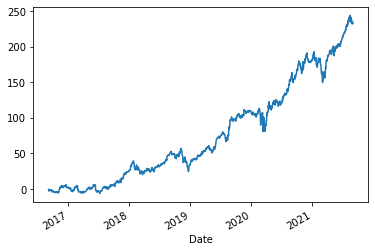

In [69]:
cewrp.plot(label = 'Equal Weighted Portfolio (CUMUL RETURNS)')

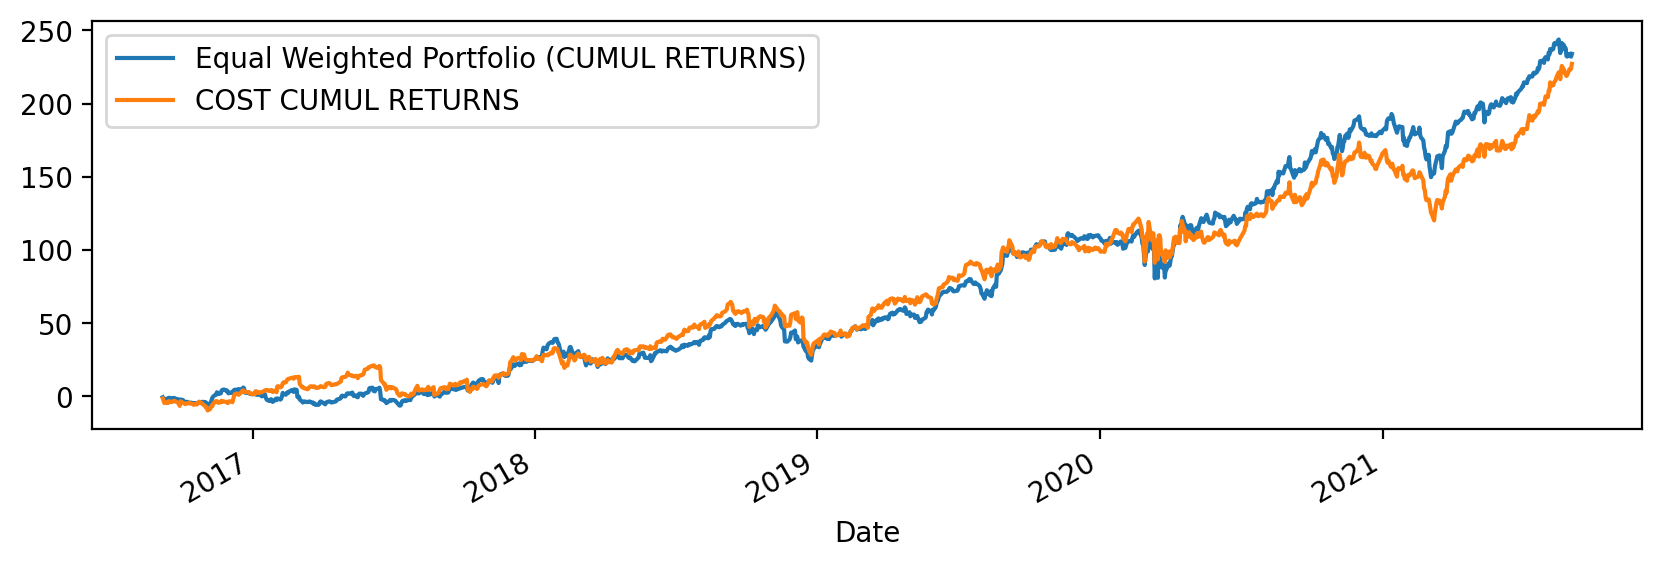

In [72]:
#To compare with 100% costco
plt.figure(figsize = (10,3), dpi = 200)
cewrp.plot(label = 'Equal Weighted Portfolio (CUMUL RETURNS)')
cumul_percent_return.plot(label = 'COST CUMUL RETURNS')
plt.legend()